In [1]:
!gdown 1sX9qmlPY1SXwboz9qOzjyLrkzCwYoT31
!unzip cars_yolo_data.zip

Downloading...
From: https://drive.google.com/uc?id=1sX9qmlPY1SXwboz9qOzjyLrkzCwYoT31
To: /content/cars_yolo_data.zip
100% 37.7M/37.7M [00:00<00:00, 41.6MB/s]
Archive:  cars_yolo_data.zip
   creating: yolo_data/
   creating: yolo_data/val/
   creating: yolo_data/val/images/
  inflating: yolo_data/val/images/vid_4_28440.jpg  
  inflating: yolo_data/val/images/vid_4_13700.jpg  
  inflating: yolo_data/val/images/vid_4_1900.jpg  
  inflating: yolo_data/val/images/vid_4_9640.jpg  
  inflating: yolo_data/val/images/vid_4_13880.jpg  
  inflating: yolo_data/val/images/vid_4_1980.jpg  
  inflating: yolo_data/val/images/vid_4_9220.jpg  
  inflating: yolo_data/val/images/vid_4_26380.jpg  
  inflating: yolo_data/val/images/vid_4_12140.jpg  
  inflating: yolo_data/val/images/vid_4_26460.jpg  
  inflating: yolo_data/val/images/vid_4_9200.jpg  
  inflating: yolo_data/val/images/vid_4_21260.jpg  
  inflating: yolo_data/val/images/vid_4_2080.jpg  
  inflating: yolo_data/val/images/vid_4_3820.jpg  
  in

In [2]:
#import ultralytics
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.238 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.4/78.2 GB disk)


In [3]:
import os
import cv2
import json
import matplotlib.pyplot as plt
from ultralytics import YOLO

In [4]:
#train
yolo_yaml_path = 'yolo_data/data.yml'
model = YOLO('yolov8s.yaml').load('yolov8s.pt')


                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics.nn.modules.conv.Conv             [256

100%|██████████| 21.5M/21.5M [00:00<00:00, 313MB/s]

Transferred 355/355 items from pretrained weights


In [5]:
epoch = 10
imgsize = 640
batch_size = 8
patience = 5
lr = 0.005

result = model.train(
    data = yolo_yaml_path,
    epochs = epoch,
    imgsz = imgsize,
    batch = batch_size,
    lr0=lr,
    patience = patience,
    project = 'model',
    name = 'yolov8/detect/train'
)

Ultralytics YOLOv8.0.238 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=yolo_data/data.yml, epochs=10, time=None, patience=5, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=model, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=T

100%|██████████| 755k/755k [00:00<00:00, 41.3MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics

100%|██████████| 6.23M/6.23M [00:00<00:00, 178MB/s]


WARNING ⚠️ NMS time limit 0.550s exceeded
AMP: checks passed ✅


train: Scanning /content/yolo_data/train/labels... 345 images, 0 backgrounds, 0 corrupt: 100%|██████████| 345/345 [00:00<00:00, 1868.06it/s]


train: New cache created: /content/yolo_data/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/yolo_data/val/labels... 26 images, 0 backgrounds, 0 corrupt: 100%|██████████| 26/26 [00:00<00:00, 1045.20it/s]

val: New cache created: /content/yolo_data/val/labels.cache


Plotting labels to model/yolov8/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.005' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      2.31G      1.497      3.173      1.199          0        640: 100%|██████████| 44/44 [00:12<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.19it/s]

                   all         26         28      0.175      0.643      0.156      0.098



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10       2.4G      1.395       1.26      1.215          5        640: 100%|██████████| 44/44 [00:08<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.67it/s]

                   all         26         28      0.419      0.893      0.459      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      2.41G      1.345     0.9979      1.185          2        640: 100%|██████████| 44/44 [00:07<00:00,  5.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.31it/s]

                   all         26         28      0.434      0.929      0.473      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10       2.4G       1.42     0.9304      1.242          1        640: 100%|██████████| 44/44 [00:09<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.63it/s]

                   all         26         28      0.387      0.786      0.429      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      2.41G      1.281      0.842       1.17          0        640: 100%|██████████| 44/44 [00:09<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.65it/s]

                   all         26         28      0.435      0.893      0.508      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      2.42G      1.305     0.8376      1.176          1        640: 100%|██████████| 44/44 [00:07<00:00,  5.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.62it/s]

                   all         26         28      0.402      0.887      0.457      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10       2.4G      1.231     0.7273      1.157          1        640: 100%|██████████| 44/44 [00:09<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.68it/s]

                   all         26         28      0.422      0.929       0.51      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      2.42G      1.257     0.6685      1.151          1        640: 100%|██████████| 44/44 [00:09<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.36it/s]

                   all         26         28      0.442      0.906      0.512      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10       2.4G       1.23     0.6718      1.151          1        640: 100%|██████████| 44/44 [00:07<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.76it/s]

                   all         26         28      0.418      0.964      0.454      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      2.42G      1.141      0.632        1.1          3        640: 100%|██████████| 44/44 [00:08<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.40it/s]

                   all         26         28      0.452      0.929      0.465      0.322
Stopping training early as no improvement observed in last 5 epochs. Best results observed at epoch 5, best model saved as best.pt.
To update EarlyStopping(patience=5) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



10 epochs completed in 0.030 hours.
Optimizer stripped from model/yolov8/detect/train/weights/last.pt, 22.5MB
Optimizer stripped from model/yolov8/detect/train/weights/best.pt, 22.5MB

Validating model/yolov8/detect/train/weights/best.pt...
Ultralytics YOLOv8.0.238 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.34it/s]


                   all         26         28      0.435      0.893      0.508      0.338
Speed: 0.1ms preprocess, 4.1ms inference, 0.0ms loss, 1.9ms postprocess per image
Results saved to model/yolov8/detect/train


In [6]:
#evaluation
model_path = '/content/model/yolov8/detect/train/weights/best.pt'
model = YOLO(model_path)

metrics = model.val(
    project = 'model',
    name = 'yolov8/detect/val'
)

Ultralytics YOLOv8.0.238 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs


val: Scanning /content/yolo_data/val/labels.cache... 26 images, 0 backgrounds, 0 corrupt: 100%|██████████| 26/26 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.45it/s]


                   all         26         28      0.435      0.893      0.508      0.338
Speed: 0.2ms preprocess, 27.1ms inference, 0.0ms loss, 3.1ms postprocess per image
Results saved to model/yolov8/detect/val


In [7]:
test_img_path = '/content/yolo_data/train/images/vid_4_10000.jpg'
model = YOLO(model_path)

model.predict(test_img_path,save=True)


image 1/1 /content/yolo_data/train/images/vid_4_10000.jpg: 384x640 4 cars, 146.7ms
Speed: 2.7ms preprocess, 146.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'car'}
 obb: None
 orig_img: array([[[254, 217, 161],
         [254, 217, 161],
         [253, 216, 158],
         ...,
         [252, 199, 142],
         [252, 199, 142],
         [251, 198, 141]],
 
        [[254, 217, 161],
         [253, 216, 160],
         [253, 216, 158],
         ...,
         [252, 199, 142],
         [252, 199, 142],
         [252, 199, 142]],
 
        [[254, 217, 159],
         [254, 217, 159],
         [253, 216, 158],
         ...,
         [253, 199, 144],
         [253, 199, 144],
         [253, 199, 144]],
 
        ...,
 
        [[ 58,  43,  34],
         [ 58,  43,  34],
         [ 58,  43,  34],
         ...,
         [ 52,  41,  27],
         [ 51,  40,  26],
         [ 51,  40,  26]],
 
        [[ 59,  44,  35],
         [ 59,  44,  35],
         [ 59,  44,  35],
         ...,
         [ 52,  41,  

In [11]:
from google.colab.patches import cv2_imshow

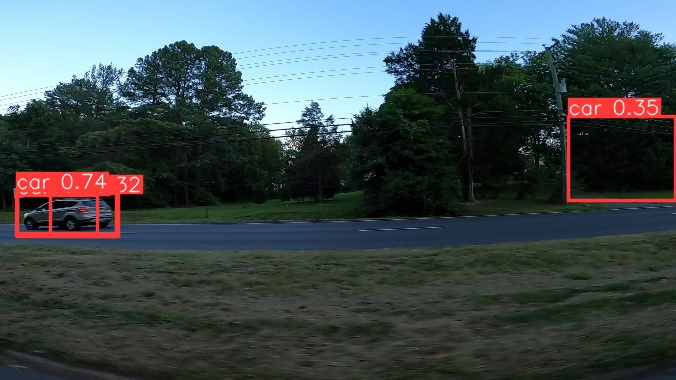

In [14]:
result_path = '/content/runs/detect/predict/vid_4_10000.jpg'
image = cv2.imread(result_path)
cv2_imshow(image)